# Sentiment Analysis

In [1]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [12]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/product_reviews.csv")
df.head()

,Review,Sentiment
0,This product is really great! I definitely rec...,Negative
1,"I didn't like the product, it's not as expected.",Positive
2,"It's nice, but a bit expensive.",Neutral
3,"The product quality is very good, but the deli...",Neutral
4,"Great experience, I will buy it again.",Positive


In [4]:
comments= list(df["Review"])
comments

['This product is really great! I definitely recommend it.',
 "I didn't like the product, it's not as expected.",
 "It's nice, but a bit expensive.",
 'The product quality is very good, but the delivery was late.',
 'Great experience, I will buy it again.',
 'I was disappointed, not as expected.',
 'Very good value for the price.',
 'Fast shipping, good quality product, satisfied.',
 'The product is great, but the color was a bit different.',
 "Let's see how it lasts after more use.",
 "Really happy with the product, it's perfect.",
 'I keep having the same problem, support is very slow.',
 "I didn't like it, it didn't meet my expectations.",
 "The price is high, but it's still a nice product.",
 'Exactly what I wanted, thanks!',
 'Could have been a bit more durable.',
 'Product descriptions are accurate, but the quality is a bit weak.',
 'Fast delivery, excellent product!',
 'Easy to use, I definitely recommend it.',
 'The product is not like in the pictures, disappointing.',
 'A litt

In [5]:
analyzer = pipeline("sentiment-analysis",
                    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [6]:
results = analyzer(comments)

In [7]:
for number, comment, result in zip(range(len(comments)), comments, results):
    print(f"Comment {number+1}: {comment}, Result {number+1}: {result}")

Comment 1: This product is really great! I definitely recommend it., Result 1: {'label': 'POSITIVE', 'score': 0.9998766183853149}
Comment 2: I didn't like the product, it's not as expected., Result 2: {'label': 'NEGATIVE', 'score': 0.9959824085235596}
Comment 3: It's nice, but a bit expensive., Result 3: {'label': 'POSITIVE', 'score': 0.9953829646110535}
Comment 4: The product quality is very good, but the delivery was late., Result 4: {'label': 'NEGATIVE', 'score': 0.9953492283821106}
Comment 5: Great experience, I will buy it again., Result 5: {'label': 'POSITIVE', 'score': 0.9998176693916321}
Comment 6: I was disappointed, not as expected., Result 6: {'label': 'NEGATIVE', 'score': 0.9996328353881836}
Comment 7: Very good value for the price., Result 7: {'label': 'POSITIVE', 'score': 0.9998703002929688}
Comment 8: Fast shipping, good quality product, satisfied., Result 8: {'label': 'POSITIVE', 'score': 0.9998420476913452}
Comment 9: The product is great, but the color was a bit diffe

In [8]:
df["Sentiment"] = [result["label"] for result in results]
df["Score"] = [result["score"] for result in results]
df.head()

,Review,Sentiment,Score
0,This product is really great! I definitely rec...,POSITIVE,0.999877
1,"I didn't like the product, it's not as expected.",NEGATIVE,0.995982
2,"It's nice, but a bit expensive.",POSITIVE,0.995383
3,"The product quality is very good, but the deli...",NEGATIVE,0.995349
4,"Great experience, I will buy it again.",POSITIVE,0.999818


In [9]:
print("Shape of Dataframe:",df.shape[0])
print("Positive Reviews:",df[df["Sentiment"]=="POSITIVE"].shape[0], ", Ratio", round(df[df["Sentiment"]=="POSITIVE"].shape[0]/df.shape[0]*100,2))
print("Negative Reviews:",df[df["Sentiment"]=="NEGATIVE"].shape[0], ", Ratio", round(df[df["Sentiment"]=="NEGATIVE"].shape[0]/df.shape[0]*100,2))

Shape of Dataframe: 88
Positive Reviews: 56 , Ratio 63.64
Negative Reviews: 32 , Ratio 36.36


# RESULTS

## Strong Predictions

In [13]:
strong_predictions = round(df[df["Score"] > 0.9].shape[0]/ df.shape[0] *100, 2)
weak_predictions= round((100- df[df["Score"] > 0.9].shape[0]/ df.shape[0] *100), 2)

In [14]:
print("Ratio of Strong Predictions %",strong_predictions)
print("Ratio of Weak Predictions %",weak_predictions)

Ratio of Strong Predictions % 95.45
Ratio of Weak Predictions % 4.55


## Weak Predictions

In [11]:
df[df["Score"] < 0.9]

,Review,Sentiment,Score
44,Nice but a bit heavy.,NEGATIVE,0.657470
58,"Good value, but not great quality.",NEGATIVE,0.809256
70,"I'm satisfied, but it could be a bit cheaper.",NEGATIVE,0.659053
78,"Nice, but a bit heavy.",POSITIVE,0.634872


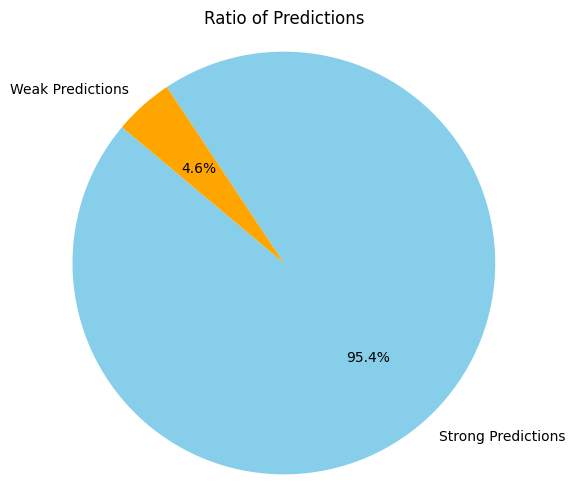

In [18]:
sizes = [strong_predictions, weak_predictions]
colors = ["skyblue", "orange"]
labels = ['Strong Predictions', 'Weak Predictions']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Predictions')
plt.axis('equal')
plt.show()